In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import random
from random import uniform
from time import sleep
from IPython.display import clear_output
%matplotlib inline

In [2]:
def rotate_it(x, y, angle):
    #[#] This function should rotate x and y to new values
    #    based on the input angle according to the 'rotation matrix'
    
    theta = angle * np.pi / 180
    R = np.matrix([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    xyC = np.matrix([x,y])
    
    #display(xyC)
    
    xyC = R * xyC
    
    #display(xyC)
    
    xnew = xyC[0]
    ynew = xyC[1]
    
    return xnew, ynew


In [17]:
N_angles = 50

angle_shift = np.pi/10.
angles = np.linspace(0, np.pi, N_angles)

#[#] What does this step do?
#Generates a radius/distance value constrained by sin^2 based off of the angles (leaf pattern)
r = np.sin(angles)**2
x_prime = r*np.sin(angles)
y_prime = r*np.cos(angles)

dataFull = []
dataFullVAMax = []
dataFullVAAvg = []

tlo = 0
thi = 10
Nt = 20
random.seed(131)

for t in np.linspace(tlo, thi, Nt):
    
    rand_scale = 1.3
    
    #[#] should be a random float between 1/(rand_scale) and
        #rand_scale
    rand1 = random.uniform(1/rand_scale, rand_scale)
    
    x = x_prime / rand1
    y = y_prime / rand1
    
    x, y = rotate_it(x, y, angle_shift)
    
    rad = np.sqrt((np.power(x,2)) + (np.power(y,2)))
    
    dataFull.append([x,y])
    dataFullVAMax.append(np.abs(np.arctan(x[0,np.argmax(rad)]/y[0,np.argmax(rad)])))
    #dataFullVAAvg.append(np.abs(np.arctan(np.average(x)/np.average(y))))
    #display(np.average(x),np.average(y))

In [20]:
display(dataFull[0])
dispaly(dataFull)
#display(dataFull[0][0].max())
display(dataFullVAMax)
#display(dataFullVAAvg)

[matrix([[0.00000000e+00, 2.56809938e-04, 2.13756848e-03, 7.24757994e-03,
          1.70594547e-02, 3.28519711e-02, 5.56561702e-02, 8.62106990e-02,
          1.24928076e-01, 1.71873153e-01, 2.26754586e-01, 2.88929666e-01,
          3.57422342e-01, 4.30953815e-01, 5.07984568e-01, 5.86766334e-01,
          6.65402083e-01, 7.41911844e-01, 8.14301945e-01, 8.80635144e-01,
          9.39099065e-01, 9.88070437e-01, 1.02617277e+00, 1.05232536e+00,
          1.06578182e+00, 1.06615669e+00, 1.05343922e+00, 1.02799374e+00,
          9.90546671e-01, 9.42160581e-01, 8.84196321e-01, 8.18264569e-01,
          7.46168596e-01, 6.69840334e-01, 5.91272120e-01, 5.12446588e-01,
          4.35267309e-01, 3.61492711e-01, 2.92675694e-01, 2.30111155e-01,
          1.74793340e-01, 1.27384572e-01, 8.81964846e-02, 5.71844305e-02,
          3.39552543e-02, 1.77881067e-02, 7.66751306e-03, 2.32744949e-03,
          3.04771691e-04, 8.77945479e-35]]),
 matrix([[ 0.00000000e+00,  4.37508320e-03,  1.73271401e-02,
      

[1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.544222372457284,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.5332561453449622,
 1.544222372457284,
 1.5332561453449622]

TypeError: cannot unpack non-iterable FancyArrow object

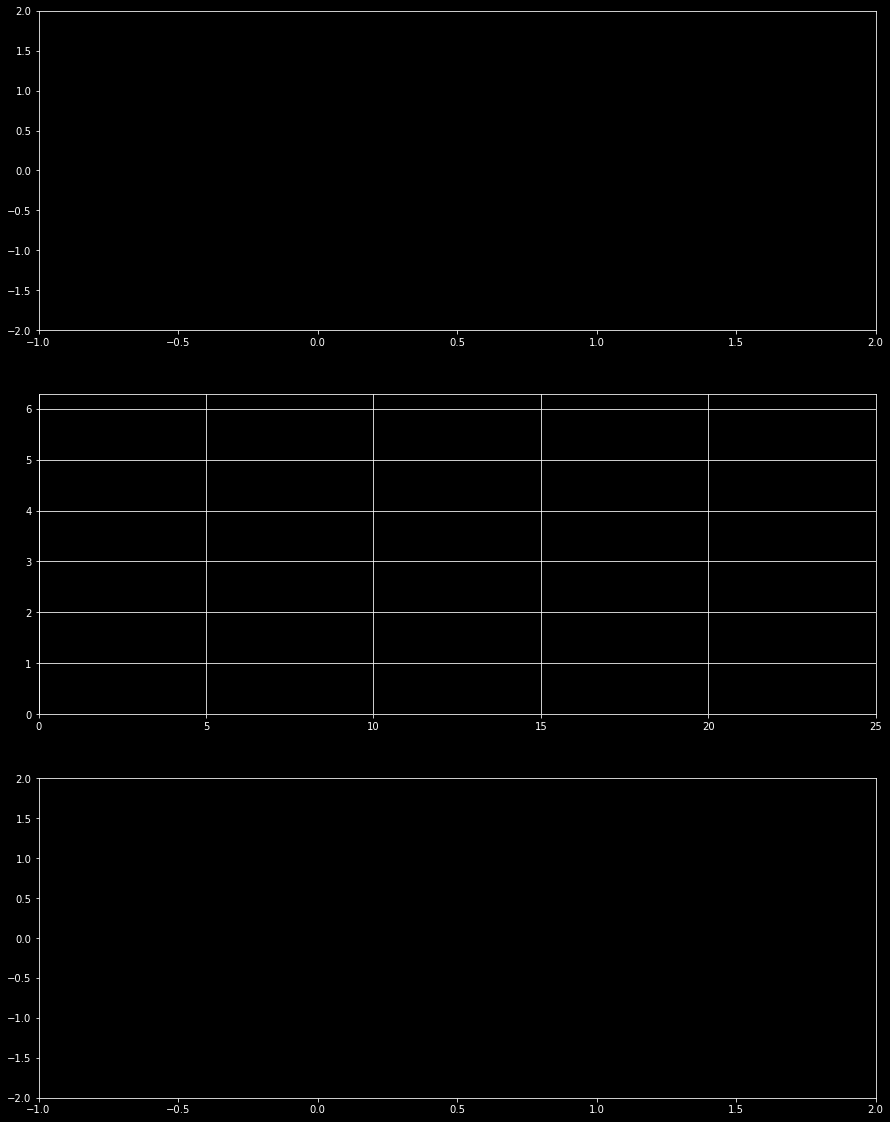

In [23]:
#[#] plotting needed - use the matplotlib 
    #'Dark background style sheet'
    
#     fig = plt.figure()       
#     ax = fig.add_subplot(111)
#     ax.clear()
#     ax.set_xlim(15,15)
#     ax.set_ylim(15,15)
#     ax.plot(x,y)
#     plt.pause(0.1)

plt.style.use('dark_background')
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_size_inches(15,20)

pltLim = 2
ax1.set_xlim([-pltLim/2,pltLim])
ax1.set_ylim([-pltLim,pltLim])
leafPlut, = ax1.plot([], [])

ax2.set_xlim([0,Nt+5])
ax2.set_ylim([0,2*np.pi])
ax2.grid()
anglePlut, = ax2.plot([], [])

ax3.set_xlim([-pltLim/2,pltLim])
ax3.set_ylim([-pltLim,pltLim])
arrowPlot, = ax3.arrow([],[],[],[])

def animateLeaf(i):
    leafPlut.set_data(dataFull[i][0].tolist()[0],dataFull[i][1].tolist()[0])
    anglePlut.set_data(np.arange(0,i), dataFullVAMax[:i])
    arrowPlot.set_data(0 ,0 ,1 ,1 )
    return leafPlut, anglePlut, arrowPlot,

fullAnimateLeaf = animation.FuncAnimation(fig, animateLeaf, frames = Nt, interval = 100, blit = True)
fullAnimateLeaf.save('TestAnimationLeaf.gif', writer='imagemagick')

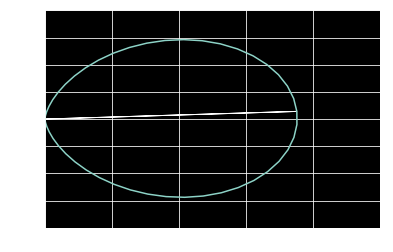

In [85]:
#display(np.array(dataFull[i][0].tolist()[0]))
# fig = plt.figure()       
# ax = fig.add_subplot(111)

    
for i in range(len(dataFull)):
    fig = plt.figure()       
    ax = fig.add_subplot(111)
    
    xPlot = np.array(dataFull[i][0].tolist()[0])*i
    yPlot = np.array(dataFull[i][1].tolist()[0])*i
    
    rad = np.sqrt((xPlot**2) + (yPlot**2))
    
    ax.arrow(0,0,xPlot[np.argmax(rad)],yPlot[np.argmax(rad)])
    ax.plot(xPlot,yPlot)
    ax.grid()
    
    ax.set_xlim(0,25)
    ax.set_ylim(-10,10)
    
    plt.show()
    sleep(0.01)
    clear_output(wait=True)